In [1]:
import tensorflow as tf
import keras as kr
import os
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [3]:
batch_size = 32
img_size = [180, 180]
train_dir = './chest_xray/train/'
val_dir = './chest_xray/val/'
test_dir = './chest_xray/test/'

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

Found 5216 files belonging to 2 classes.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=img_size,
  batch_size=batch_size)


Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [6]:
class_names = train_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


In [8]:
plt.figure(figsize=(15, 15))

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

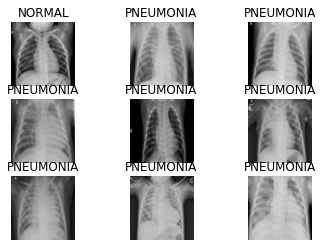

In [9]:
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [11]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [12]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.040239666 0.9960785


In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [36]:
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2, activation='sigmoid')
])


In [35]:
print(layers.shape)

AttributeError: module 'tensorflow.keras.layers' has no attribute 'shape'

In [26]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [27]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3


InvalidArgumentError:  Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-27-ce06c3301011>:1) ]] [Op:__inference_train_function_3525]

Function call stack:
train_function


In [39]:
from keras.preprocessing import image
from keras.models import load_model

In [40]:
model_k = load_model('./pneumonia.h5')

In [18]:
img=image.load_img('./chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg',target_size=(180,180))

In [19]:
x=image.img_to_array(img)

In [20]:
x=np.expand_dims(x, axis=0)

In [21]:
classes = model.predict(x)

ValueError: in user code:

    C:\programmin\mg\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\programmin\mg\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\programmin\mg\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\programmin\mg\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\programmin\mg\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\programmin\mg\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\programmin\mg\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\programmin\mg\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\programmin\mg\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\programmin\mg\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\programmin\mg\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\programmin\mg\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\programmin\mg\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 12800 but received input with shape [None, 21632]


In [22]:
print(classes)

NameError: name 'classes' is not defined

In [45]:
abc = model.predict(val_ds)

In [43]:
print(abc, labels)

[[0.48457566 0.4889691 ]
 [0.4841168  0.4871902 ]
 [0.47994474 0.47897995]
 [0.4809649  0.48930693]
 [0.4847226  0.4808965 ]
 [0.47653937 0.48600966]
 [0.4857368  0.48529983]
 [0.46888056 0.48758602]
 [0.4867902  0.48128867]
 [0.4867589  0.48190215]
 [0.47695768 0.4863503 ]
 [0.4706444  0.48608923]
 [0.4777882  0.48022902]
 [0.48382148 0.4810061 ]
 [0.48827747 0.482489  ]
 [0.479301   0.4871444 ]] tf.Tensor([0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1], shape=(32,), dtype=int32)


In [54]:
np.savetxt('test_1.txt', abc)